In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 300,
})

from Finite_volume_method_1D import *

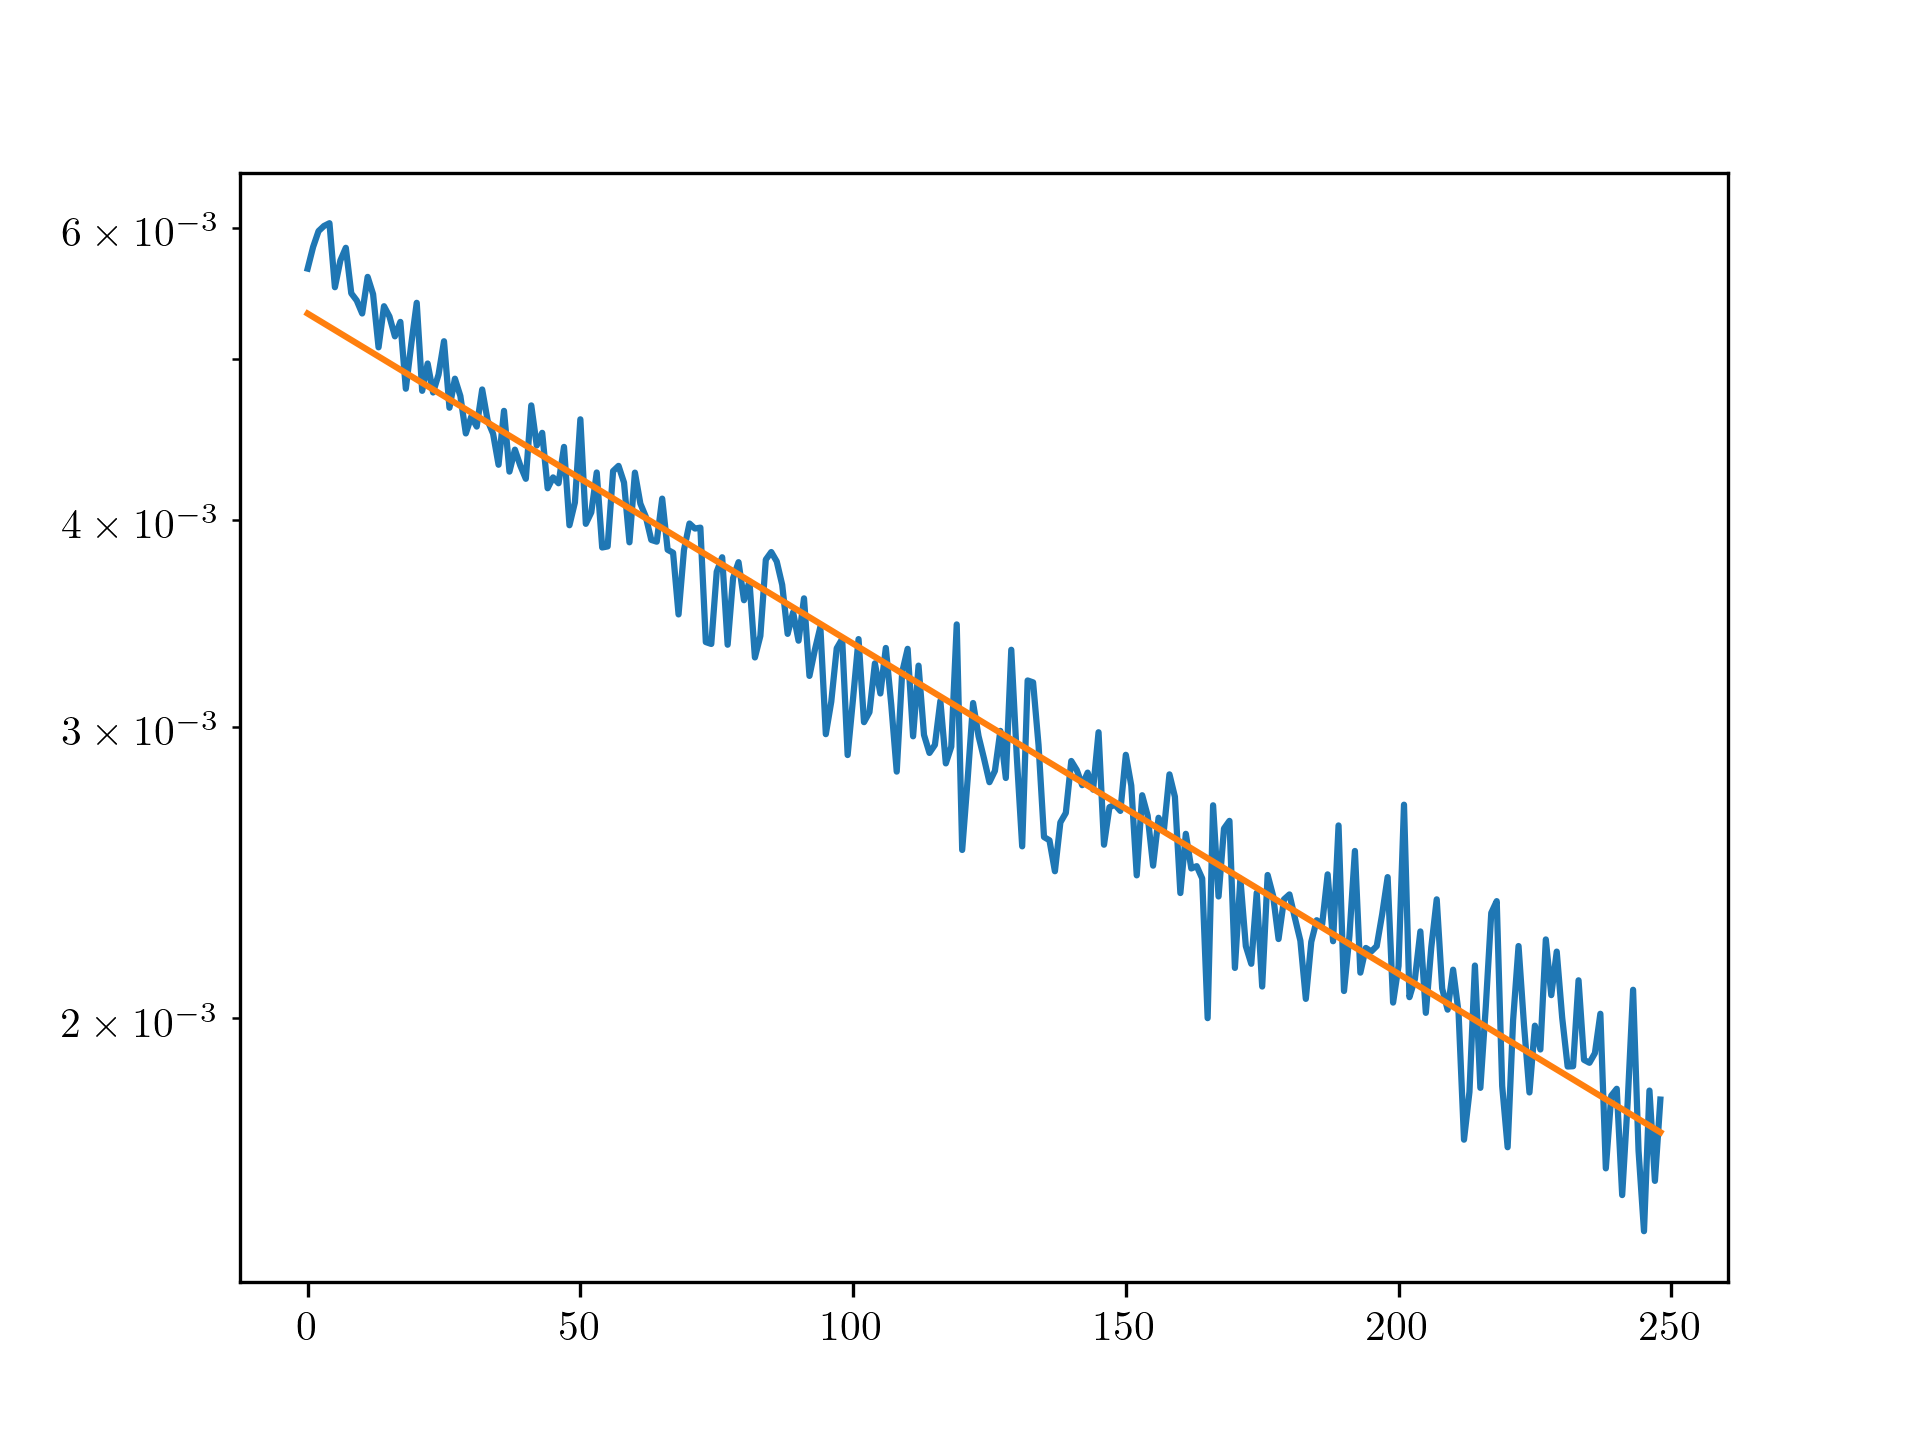

In [2]:
chippath = '../../DataKian/bTa_LT278W2chip5/'
filename = 'KID3_96dBm__TmK20_avgpulse_ampphase.csv'
length = 90

lambdanm = 402
KID402 = KID_data(chippath,lambdanm,filename,length)
KID402.fit_tail(start=250,end=-1)

In [3]:
params = KID_params(eta_pb=0.57,sigma_IC=1,Teff=0.11,KID=KID402,trickle_time=0.03)
params.print()

eta_pb: 	 0.57
sigma_IC: 	 1
Q0: 		 1.8211044022190084
lambda_ph: 	 0.402
tau_ringing: 	 0.5617264732506613
dthetadN: 	 5.906045429967e-05
N0: 		 30300000000.0
D0: 		 75
L: 		 0.004586835488671205
Delta: 		 0.00013254852308880002
lxhxw: 		 90 x 0.04 x 10.0
trickle_time: 	 0.03


In [4]:
dtset=0.001
dxfrac=1/4
simtime=50

SIM = KID_sim(params=params,dt_init=dtset,dx_or_fraction=1/8,D_const=False,simtime_approx=simtime)

 96%|█████████▌| time (us): 50.009099337397004  


In [5]:
SIMconstdx = KID_sim(params=params,dt_init=dtset,dx_or_fraction=params.sigma_IC*dxfrac,D_const=False,adaptivedx=False,simtime_approx=simtime)

 96%|█████████▋| time (us): 50.09141868571011   


In [6]:
SIMconstdt = KID_sim(params=params,dt_init=dtset,dx_or_fraction=dxfrac,D_const=False,adaptivedt=False,simtime_approx=simtime)

 96%|█████████▌| time (us): 50.00099999997417   


In [7]:
SIMconstdtdx = KID_sim(params=params,dt_init=dtset,dx_or_fraction=params.sigma_IC*dxfrac,D_const=False,adaptivedt=False,adaptivedx=False,simtime_approx=simtime)

 96%|█████████▌| time (us): 50.00099999997417   


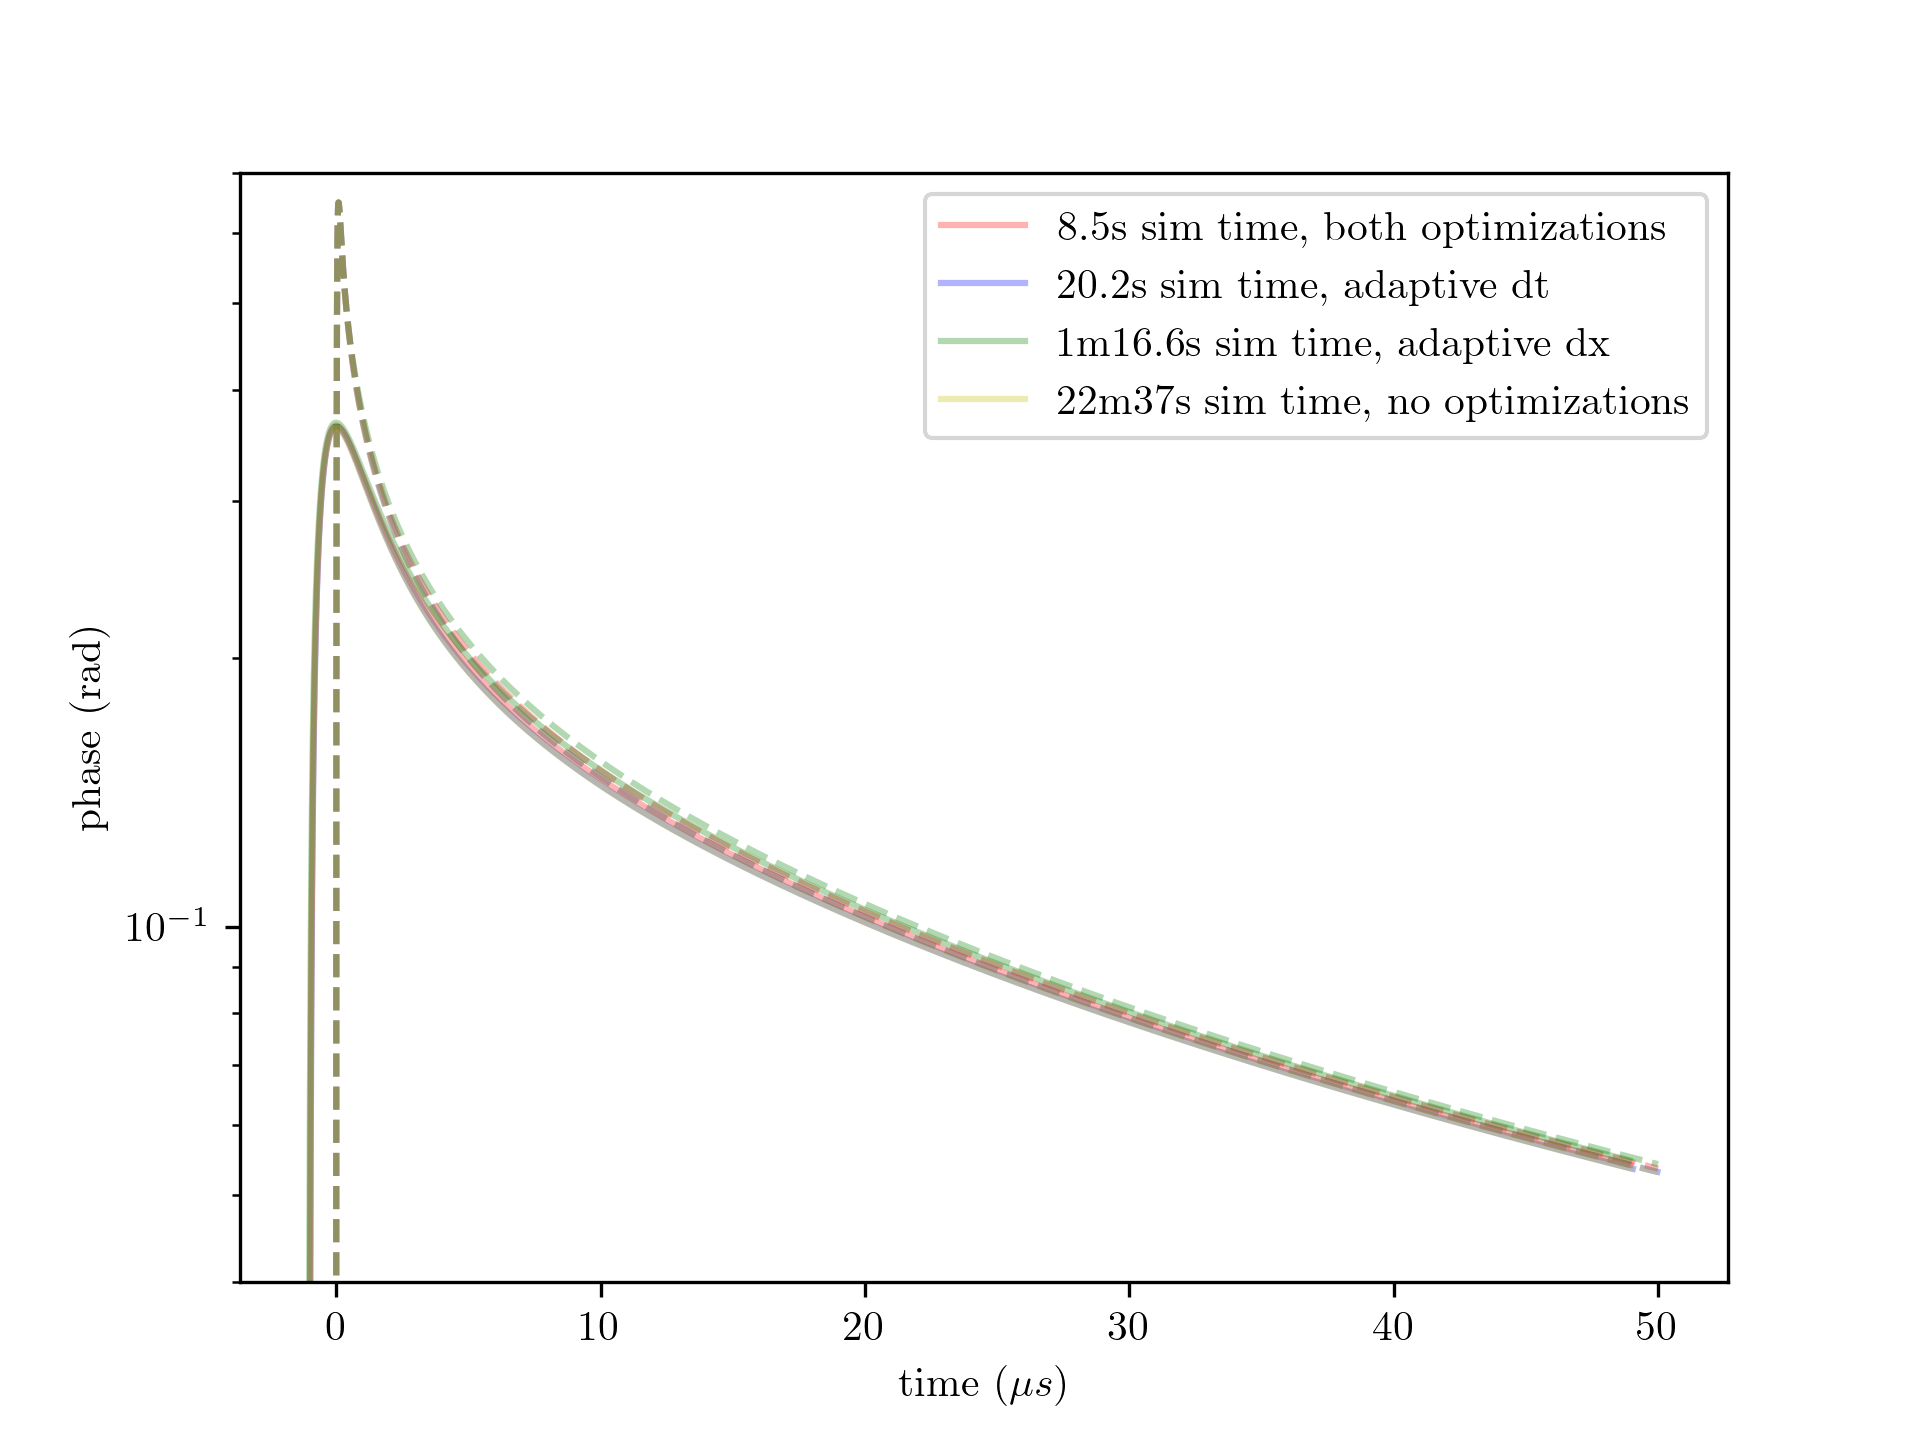

In [13]:
alpha=0.3
plt.figure()
plt.ylim(0.04,0.7)
plt.plot(SIM.t_axis_interp,SIM.phaseintime,color='r',alpha=alpha,label='8.5s sim time, both optimizations')
plt.plot(SIM.t_axis,SIM.Nqpintime*SIM.params.dthetadN,color='r',ls='--',alpha=alpha)
plt.plot(SIMconstdx.t_axis_interp,SIMconstdx.phaseintime,color='b',alpha=alpha,label='20.2s sim time, adaptive dt')
plt.plot(SIMconstdx.t_axis,SIMconstdx.Nqpintime*SIMconstdx.params.dthetadN,color='b',ls='--',alpha=alpha)
plt.plot(SIMconstdt.t_axis_interp,SIMconstdt.phaseintime,color='g',alpha=alpha,label='1m16.6s sim time, adaptive dx')
plt.plot(SIMconstdt.t_axis,SIMconstdt.Nqpintime*SIMconstdt.params.dthetadN,color='g',ls='--',alpha=alpha)
plt.plot(SIMconstdtdx.t_axis_interp,SIMconstdtdx.phaseintime,color='y',alpha=alpha,label='22m37s sim time, no optimizations')
plt.plot(SIMconstdtdx.t_axis,SIMconstdtdx.Nqpintime*SIMconstdtdx.params.dthetadN,color='y',ls='--',alpha=alpha)
plt.xlabel(r'time ($\mu s$)')
plt.ylabel(r'phase (rad)')
plt.semilogy()
plt.legend()
plt.show()

In [ ]:
freq = 20 #hz
fig, ax=plt.subplots()
ax.axis([-5,5,0,np.max([np.max(Q) for Q in SIM.Qintime])])
line, = ax.plot([],[])

def animate(i):
    xpos = SIM.x_centers_list[i]
    xneg = -np.flip(xpos)
    x = np.concatenate([xneg,xpos])
    Qpos = SIM.Qintime[i]
    Qneg = np.flip(Qpos)
    Q=np.concatenate([Qneg,Qpos])
    line.set_data(x,Q)
    ax.set_title("time (us): {:.4f}, frame: {}".format(SIM.t_axis[i],i))

ani = animation.FuncAnimation(fig, animate, frames=500, interval=1000/freq, blit=True)

ani.save('movie.mp4',fps=freq,dpi=200)

In [ ]:
SIM.Nqp_init

In [ ]:
plt.figure()
plt.plot(SIM.t_axis)
plt.show()

plt.figure()
plt.plot(SIM.dtlist)
plt.show()